In [2]:
pip install networkx

DEPRECATION: Loading egg at /Users/margheritatonon/anaconda3/envs/codinglab/lib/python3.11/site-packages/certifi-2024.8.30-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/margheritatonon/anaconda3/envs/codinglab/lib/python3.11/site-packages/requests-2.32.3-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/margheritatonon/anaconda3/envs/codinglab/lib/python3.11/site-packages/idna-3.10-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import random

### Undirected Graphs

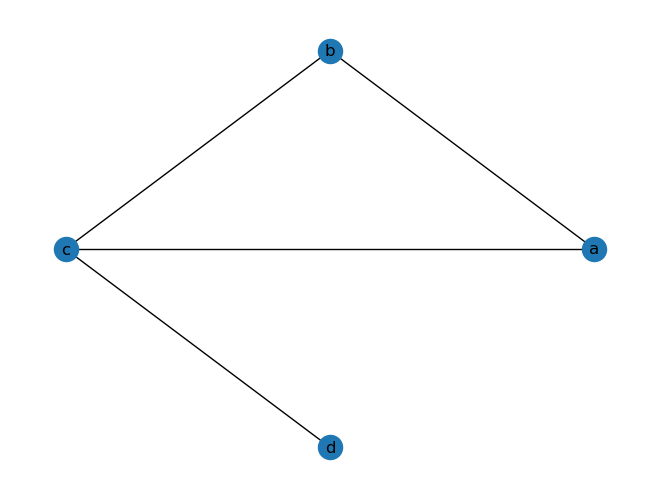

In [ ]:
#always start with empty - by default undirected
G = nx.Graph()

#add a name to nodes
G.add_node("a") #graphs are mutable

nodes_to_add = ["b", "c", "d"]
G.add_nodes_from(nodes_to_add)

#edges
G.add_edge("a", "b")
edges_to_add = [("a", "c"), ("b", "c"), ("c", "d")]
G.add_edges_from(edges_to_add)

#draw

pos = nx.circular_layout(G) #can add it circularly (just changes layout)
nx.draw(G, with_labels = True, pos = pos) #shows node names
plt.show()

In [3]:
#checking if a graph is connected - if every component is connnected w each other
nx.is_connected(G)

True

In [4]:
#print basic info abt the graoh
print(G)

#path length:
shortest_path = nx.shortest_path(G, "d", "a") #and to get the length of this, do len()
print(shortest_path)
print(len(shortest_path) - 1) #because it is telling you 3 names but there is one less edge than the nodes

#list all nodes
print("Nodes: ", G.nodes())
print("Edges: ", G.edges())

Graph with 4 nodes and 4 edges
['d', 'c', 'a']
2
Nodes:  ['a', 'b', 'c', 'd']
Edges:  [('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd')]


In [ ]:
#degree of a node - how many neighbors a node has
G.degree("a") #usually we see if hub


2

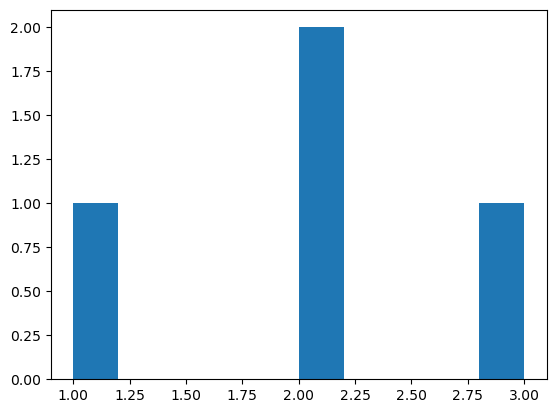

In [7]:
#the average degree of a network - just the average degree of the nodes
#the higher the avg degree, the more connected


#nodes (y) vs degree (x)
    #can be a normal distribution  - mot nodes have the same degree
    #long tailed - exponential. right skewed --> some nodes have a lot of degrees (called hubs)

nodes_list = []
for node in G.nodes():
    degree = G.degree(node)
    nodes_list.append(degree)

plt.hist(nodes_list)
plt.show()


In [8]:
avg_degree = sum(nodes_list) / len(nodes_list)
print(avg_degree)

2.0


In [ ]:
#density
print("Density = ", nx.density(G))
#sparse when D << 1 and dense when D almost = 1 (cannot be higher than 1)
#edges you have vs all the possible edges you could have
#density of 1: every node is connected to every other node, fully connected

#2*E / (V*(V-1)) E is num of edges, V is num nodes.
#when graph is directed, you remove the 2 (bc u have 2 more nodes per edge)

Density =  0.6666666666666666


### Directed Graphs

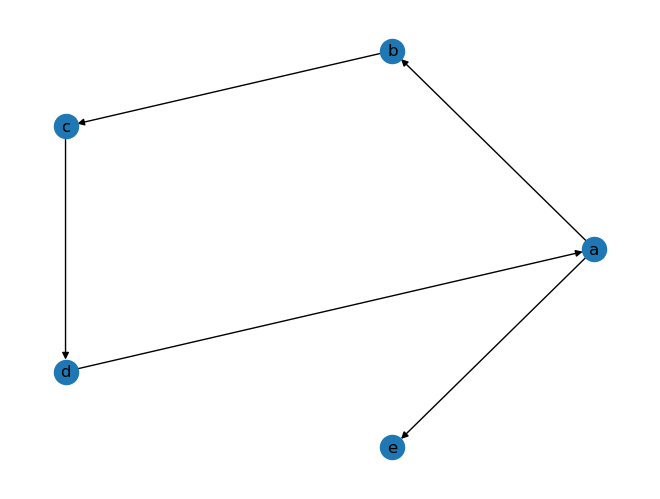

In [19]:
#initialize the graph
D = nx.DiGraph()

#adding edges: order of tuples matters, (a, b) is from a to b but not b to a.

D.add_edges_from([("a", "b"), ("b", "c"), ("c", "d"), ("d", "a"), ("a", "e")])
pos = nx.circular_layout(D) #can add it circularly (just changes layout)
nx.draw(D, with_labels = True, pos = pos) #shows node names
plt.show()

In [ ]:
print(D)

#in degree - how many edges point to that node
print("In degree of a: ", D.in_degree('a'))

#out degree - how many edges point out of that node
print("out degree of a: ", D.out_degree("a"))

DiGraph with 5 nodes and 5 edges
In degree of a:  1
out degree of a:  2


In [22]:
#density of directed graphs
#E / (V*(V-1)) E is num of edges, V is num nodes.
print("Density: ", nx.density(D))

Density:  0.25


Paths in a graph

In [ ]:
print(nx.has_path(G, "a", "b"))
print(nx.shortest_path(G, "a", "b")) #if there is no connection there is gonna be an error

True
['a', 'b']


In [29]:
#knowing all paths - not j shortest
list(nx.all_simple_paths(G, "d", "b"))

[['d', 'c', 'a', 'b'], ['d', 'c', 'b']]

In [32]:
#diameter: the longest shortest path between any two nodes
print("Diameter: ", nx.diameter(G))
#small world - should have a small diameter

#directed graph - some paths dont exist (eg if a goes to e but e goes to nothing, then u cant have a diameter from e to anything)
#diameter requires a graph to be strongly connected!!

Diameter:  2


Connectivity

In [40]:
G = nx.Graph()
edges_toadd = [("a", "c"), ("b", "c"), ("c", "d"), ("a", "b")]
G.add_edges_from(edges_toadd)

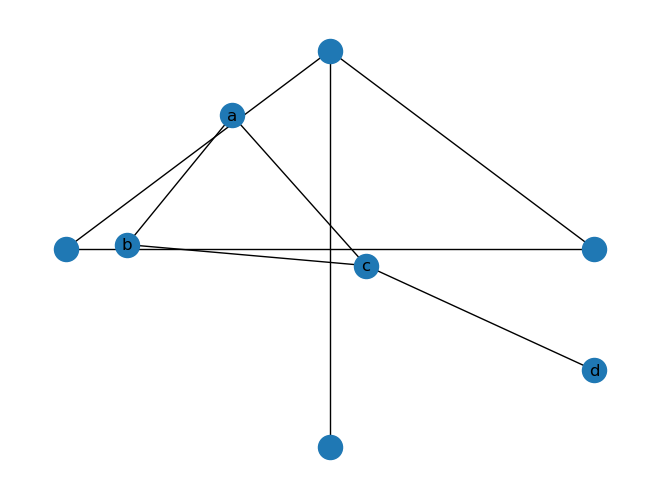

In [41]:
pos = nx.draw_circular(G)
nx.draw(G, with_labels = "True", pos = pos)
plt.show()

In [ ]:
#robust - how many edges can u remove before the graph becomes disconnected

#for directed graphs - nx.is_strongly_connected(D) and nx.is_weakly_connected(D)

In [ ]:
#can also remove an edge

#### Connected Components

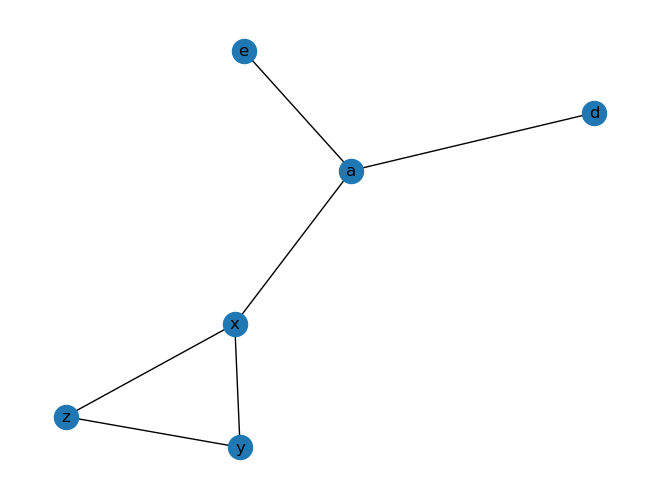

[{'a', 'e', 'z', 'd', 'x', 'y'}]


In [45]:
#the subnetworks that exist in the graph
Gr = nx.Graph()
Gr.add_edges_from([("e", "a"), ("a", "d"), ("x", "z"), ("y", "z"), ("x", "y"), ("a", "x")])
nx.draw(Gr, with_labels = True)
plt.show()

print(list(nx.connected_components(Gr)))

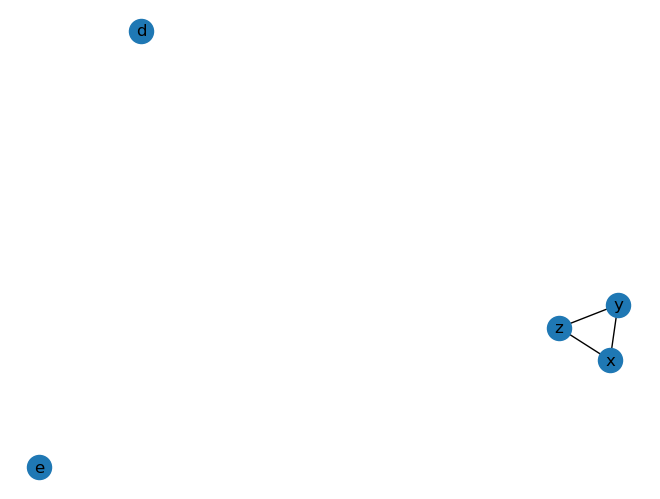

[{'e'}, {'d'}, {'y', 'z', 'x'}]


In [46]:
#now we remove node a:
Gr.remove_node("a")

nx.draw(Gr, with_labels = True)
plt.show()

print(list(nx.connected_components(Gr)))

Connected components in directed graphs

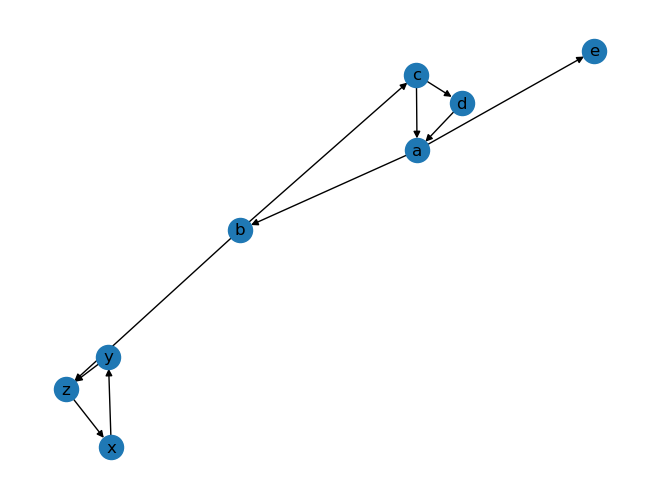

In [53]:
#components can be weakly connected or strongly connected
Dr = nx.DiGraph()
Dr.add_edges_from([("a", "e"), ("d", "a"), ("a", "b"), ("b", "c"), ("c", "a"), ("c", "d"), ("x", "y"), ("y", "z"), ("z", "x"), ("b", "z")])
nx.draw(Dr, with_labels = True)
plt.show()

#strongly connected components: 3
#weakly connected components: 2

In [56]:
print("is strongly connected ", nx.is_strongly_connected(Dr))
print("is strongly weakly ", nx.is_weakly_connected(Dr))
print(list(nx.strongly_connected_components(Dr)))

is strongly connected  False
is strongly weakly  True
[{'e'}, {'y', 'z', 'x'}, {'a', 'b', 'd', 'c'}]


### Weighted Graphs

## Flights

In [72]:
G = nx.read_graphml("/Users/margheritatonon/applied_math_lab/networkx/openflights_usa.graphml.gz")
print(G)


Graph with 546 nodes and 2781 edges


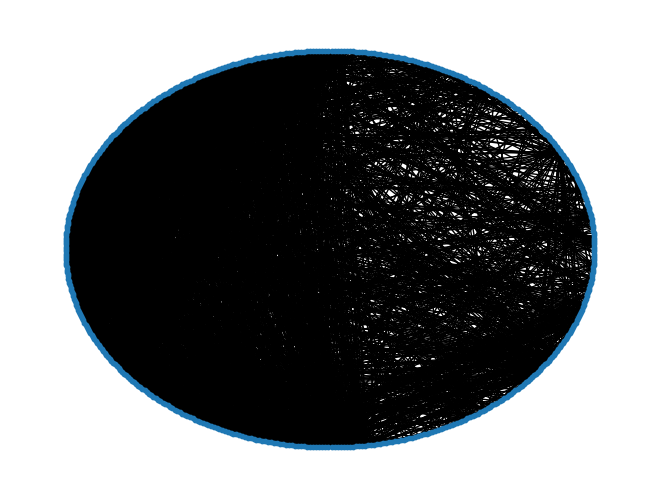

In [73]:
pos = nx.circular_layout(G)
nx.draw(G, pos=pos, node_size=10)
plt.show()

In [74]:
nx.density(G) #which is not a very low density

0.018691400342776488

In [75]:
print("Is connected: ", nx.is_connected(G))

Is connected:  False


In [76]:
#some node isnt connected
#how can we detect this?
list(nx.connected_components(G)) #list bc its a generator object

[{'ABE',
  'ABI',
  'ABL',
  'ABQ',
  'ABR',
  'ABY',
  'ACK',
  'ACT',
  'ACV',
  'ACY',
  'ADK',
  'ADQ',
  'AET',
  'AEX',
  'AGN',
  'AGS',
  'AHN',
  'AIA',
  'AIN',
  'AKK',
  'AKN',
  'AKP',
  'ALB',
  'ALO',
  'ALS',
  'ALW',
  'AMA',
  'ANC',
  'ANI',
  'ANV',
  'AOO',
  'APF',
  'APN',
  'ARC',
  'ART',
  'ASE',
  'ATK',
  'ATL',
  'ATW',
  'ATY',
  'AUG',
  'AUK',
  'AUS',
  'AVL',
  'AVP',
  'AZA',
  'AZO',
  'BDL',
  'BET',
  'BFD',
  'BFF',
  'BFL',
  'BGM',
  'BGR',
  'BHB',
  'BHM',
  'BIL',
  'BIS',
  'BJI',
  'BKC',
  'BKW',
  'BLI',
  'BLV',
  'BMI',
  'BNA',
  'BOI',
  'BOS',
  'BPT',
  'BQK',
  'BRD',
  'BRL',
  'BRO',
  'BRW',
  'BTI',
  'BTM',
  'BTR',
  'BTT',
  'BTV',
  'BUF',
  'BUR',
  'BWI',
  'BZN',
  'CAE',
  'CAK',
  'CDB',
  'CDC',
  'CDR',
  'CDV',
  'CEC',
  'CEM',
  'CEZ',
  'CGI',
  'CHA',
  'CHO',
  'CHS',
  'CIC',
  'CID',
  'CIK',
  'CIU',
  'CKB',
  'CLD',
  'CLE',
  'CLL',
  'CLT',
  'CMH',
  'CMI',
  'CMX',
  'CNM',
  'CNY',
  'COD',
  'COS',
 

In [77]:
#{'AKB', 'DUT', 'KQA'} these 3 airports only fly between one another

#how can we get just the biggest connected component?
G_biggest = max(nx.connected_components(G), key = len)
print(G_biggest)

G_biggest = G.subgraph(G_biggest) #takes the nodes out of the graph
print(G_biggest)

{'MMH', 'LYH', 'CIU', 'ISN', 'MSY', 'GGW', 'HNH', 'DDC', 'PIH', 'COS', 'GNV', 'CMI', 'SYR', 'CHO', 'ROA', 'BHM', 'OOK', 'UST', 'RIC', 'ITH', 'ROW', 'EWR', 'AGN', 'KLN', 'PIR', 'BGM', 'CKB', 'CMX', 'PIP', 'BZN', 'ECP', 'GJT', 'OME', 'SMK', 'IGG', 'VEE', 'LNS', 'PSG', 'HYA', 'PTH', 'CHS', 'PUW', 'BRO', 'GPT', 'BFF', 'MKG', 'AIA', 'ASE', 'ENA', 'OAK', 'TEB', 'OLF', 'DAY', 'JAC', 'MLY', 'AMA', 'ATK', 'TUS', 'CAE', 'SJT', 'JBR', 'BWI', 'MTJ', 'SCC', 'SLN', 'DAB', 'ELM', 'SWF', 'ORD', 'DSM', 'MFR', 'YNG', 'PNS', 'HPB', 'JFK', 'MYR', 'FAY', 'CLL', 'UIN', 'FAI', 'ABR', 'OTH', 'WMO', 'YUM', 'MYU', 'IAG', 'CPR', 'TNC', 'DEC', 'VDZ', 'EVV', 'EUG', 'VEL', 'VAK', 'BKW', 'MSS', 'BFD', 'RKS', 'FSD', 'SOW', 'LAS', 'SPS', 'FKL', 'SCK', 'ILI', 'HYG', 'CDR', 'LAX', 'PSP', 'CMH', 'CYS', 'SLQ', 'FYU', 'RNO', 'TBN', 'HRL', 'GLV', 'STL', 'OKC', 'SGY', 'ILM', 'FLG', 'SHV', 'PVU', 'BET', 'RSH', 'HNM', 'DBQ', 'TYR', 'IRC', 'LIH', 'FLL', 'GRI', 'DUJ', 'SAT', 'MBS', 'KWT', 'MVY', 'IMT', 'BTM', 'MRY', 'ABL', 'DRO'

In [79]:
print("Is connected: ", nx.is_connected(G_biggest))
print(nx.diameter(G_biggest))

Is connected:  True
7
